# README ipynb File 

This package was designed to present classification boundary methods. The three methods include broad initial sampling, low point-density sampling, and path tracing. The following code demonstrates how to use each module to run classification boundary simulations. Here we use a classification polygon to determine the classification boundary.

# Import Package from Github
This will import the boundary search package and all the sub-modules within it. It will also import matplotlib's Polygon and Path for use in the classification tasks. 

In [1]:
!pip install git+git://github.com/mayabhat/boundary_search

from sbs.densitysampling import sample as dsam
from sbs.pathtracing import sample as psam
from sbs.broadsampling import sample as bsam

from shapely.geometry import Polygon
import  matplotlib.path as mplPath
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm


  Cloning https://github.com/mayabhat/boundary_search.git to /private/var/folders/bd/rbb6rqr92vl2rjbn7_9b7lw80000gn/T/pip-req-build-aio4wh5b


  Running command git clone --filter=blob:none --quiet https://github.com/mayabhat/boundary_search.git /private/var/folders/bd/rbb6rqr92vl2rjbn7_9b7lw80000gn/T/pip-req-build-aio4wh5b


  Resolved https://github.com/mayabhat/boundary_search.git to commit 3248f8c0d6d7ba4aec9c1c4117b121299fbe117b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


# Define a Classification Polygon

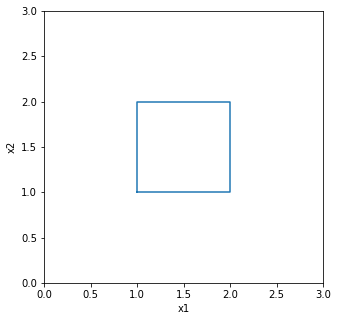

In [2]:
polygon = Polygon([(1, 1),(1, 2),(2, 2),(2, 1)])     
x,y = polygon.exterior.xy

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y)
ax.set_xlim((0, 3))
ax.set_ylim((0, 3))
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()


Within this polygon will be class 1, and outside will be class 2. The goal of the following methods is to recover the blue boundary line. 

# Broad Initial Sampling 

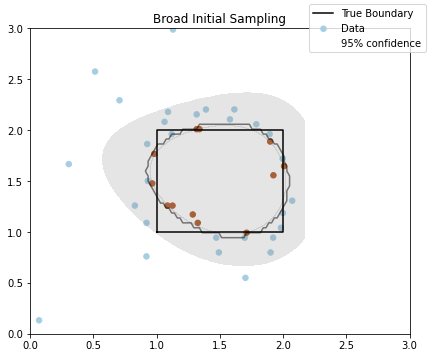

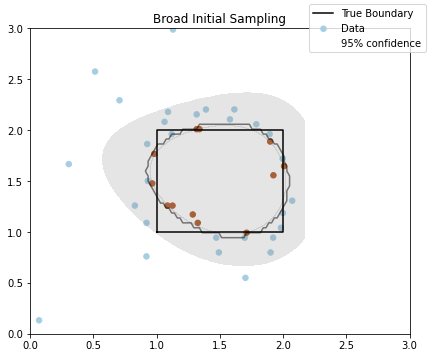

In [3]:
bs = bsam([[1.5, 1.5]], polygon, boundmin=0, boundmax=3)
bs.first_sample(ni=16)
bs.iter_sample(min_points=2, samples=4)
bs.plot_final(bs.X, bs.cat)

To initialize, bsam takes a *center point*, a *polygon shape*, and a *minimum and maximum bound*. The first sample generates a distribution of points around the center point provided. *n_{i}* is a hyperparameter that determines how many points to initially sample. Other parameters can be found in the broad initial sampling python file in sbs. 

*iter_sample* performs the simulation to recover the classification boundary within a convergence criteria. The convergence criteria are also hyperparameters that can be specified. 

*plot_final* plots the true boundary, sample points and their respective classes, predicted boundary, and 95% confidence interval. 

See documentation for tunable hyperparameters. 

# Low Point-Density Sampling


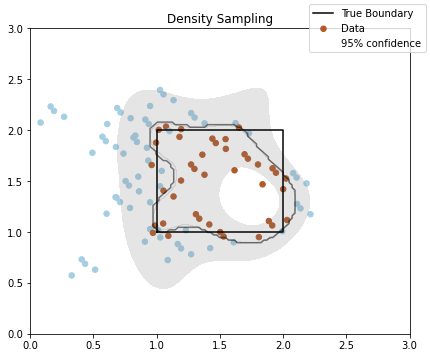

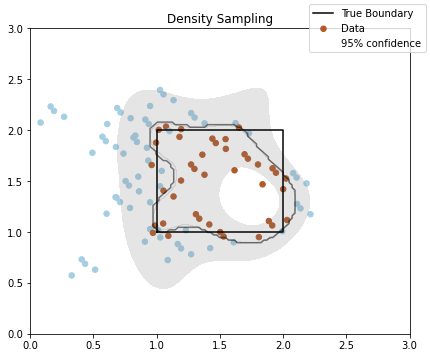

In [4]:
ds = dsam([1, 1], polygon, 0, 3)
ds.first_sample(dis=0.2)
ds.iter_sample(tol=0.01, n=4, rad_den=0.2, conv_trials=4,
               min_points=1, domain_step=0.15)
ds.plot_final(ds.X, ds.cat)


To initialize, dsam takes a *center point*, a *polygon shape*, and a *minimum and maximum bound*. The first sample generates a distribution of points around the center point provided. *dis* is a hyperparameter that determines the initial radius for sample point distribution. Other parameters can be found in the low point density sampling py file in sbs. 

*iter_sample* performs the simulation to recover the classification boundary within a convergence criteria. The convergence criteria are also hyperparameters that can be specified. 

*plot_final* plots the true boundary, sample points and their respective classes, predicted boundary, and 95% confidence interval. It takes in X and y values where X is in the shape nxm where n is the number of experiments or rows, and m are the features in column form. 

See documentation for tunable hyperparameters. 

# Path Tracing

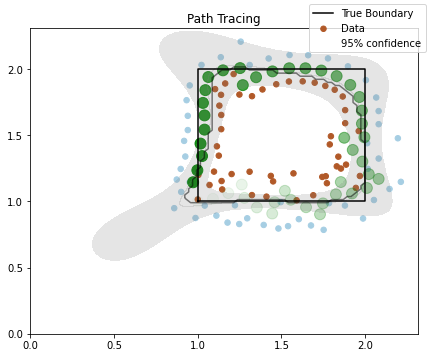

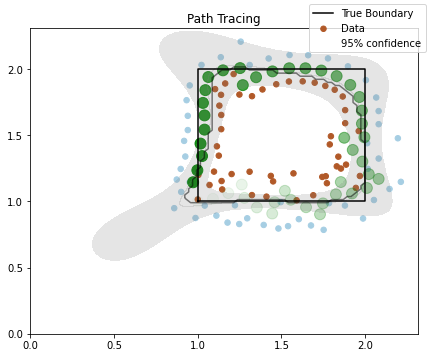

In [5]:
ps = psam([[1, 1]], polygon, 0, 3)
ps.first_sample(dis=0.3, seed=10)
ps.iter_sample(step=ps.scale*2, dis=0.1, ran_sam=False,
               conv_num=3, centol = ps.scale*3, seed=10)
ps.plot_final(ps.X, ps.cat)

To initialize, psam takes a *center point*, a *polygon shape*, and a *minimum and maximum bound*. The first sample generates a distribution of points around the center point provided. *dis* is a hyperparameter that determines the initial radius for sample point distribution. Other parameters can be found in the path tracing sampling py file in sbs. 

*iter_sample* performs the simulation to recover the classification boundary within a convergence criteria. The convergence criteria are also hyperparameters that can be specified. 

*plot_final* plots the true boundary, sample points and their respective classes, predicted boundary, and 95% confidence interval. 

See documentation for hyperparameters. 